In [ ]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam
#
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)
print("import done")

Using TensorFlow backend.


In [2]:
#https://github.com/debadridtt/A-Review-of-Different-Word-Embeddings-for-Sentiment-Classification-using-Deep-Learning/blob/master/LSTM%20Experiment.ipynb

### Loading the data

In [3]:
import os
DATA_FILE = os.path.abspath('../DATA/data.csv')
df = pd.read_csv(DATA_FILE,delimiter=';',encoding='UTF-8')
print(df.head())

                                                text     label
0  I had ordered a data cable, got a very well fi...  NOTISSUE
1                                   Love This Phone.  NOTISSUE
2                I get a very well finished product.  NOTISSUE
3                            I could not be happier.  NOTISSUE
4  I was looking for this headset for a long time...  NOTISSUE


In [4]:
df['label'].value_counts() #balanced Dataset


ISSUE       2034
NOTISSUE    2022
Name: label, dtype: int64

In [5]:
df.shape

(4056, 2)

### Exploratory Data Analysis

C:\Users\khmar\ana\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\khmar\ana\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


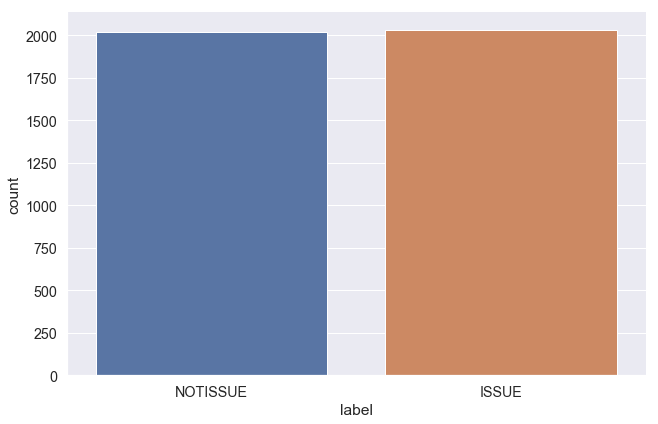

In [6]:
#Target variable
sns.factorplot(x="label", data=df, kind="count", size=6, aspect=1.5)
plt.show();

###  Preprocessing the Data


In [142]:
# List stop words
STOP_WORDS ={
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 #'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 #'became',
 'because',
 #'become',
 #'becomes',
 #'becoming',
 #'been',
 'before',
 'beforehand',
 #'behind',
 #'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 #'call',
 'can',
 'cannot',
 'could',
 'did',
 #'do',
 #'does',
 #'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 #'everything',
 'everywhere',
 'except',
 'few',
 'first',
 'for',
 'former',
 'formerly',
 'from',
 'front',
 'full',
 'further',
 #'had',
 #'has',
 #'have',
 'he',
 'hence',
 'her',
 'here',
 'hereafter',
 'hereby',
 'herein',
 'hereupon',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'however',
 'hundred',
 'i',
 'if',
 'in',
 'indeed',
 'into',
 #'is',
 'it',
 'its',
 'itself',
 'just',
 'last',
 'latter',
 'latterly',
 'least',
 'less',
 #'made',
 #'make',
 'many',
 'may',
 'me',
 'meanwhile',
 'might',
 'mine',
 'more',
 'moreover',
 'most',
 'mostly',
 'move',
 'much',
 'must',
 'my',
 'myself',
 'name',
 'namely',
 'neither',
 'nevertheless',
 'next',
 'noone',
 'nor',
 'now',
 'nowhere',
 'of',
 'off',
 'often',
 'on',
 'once',
 'only',
 'onto',
 'or',
 'other',
 'others',
 'otherwise',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'part',
 'per',
 'perhaps',
 'put',
 'quite',
 'rather',
 're',
 'really',
 'regarding',
 'same',
 #'say',
 #'see',
 #'seem',
 #'seemed',
 #'seeming',
 #'seems',
 'serious',
 'several',
 'she',
 'should',
 #'show',
 'side',
 'since',
 'so',
 'some',
 'somehow',
 'someone',
 'something',
 'sometime',
 'sometimes',
 'somewhere',
 'still',
 'such',
 #'take',
 'than',
 'that',
 'the',
 'their',
 'them',
 'themselves',
 'then',
 'thence',
 'there',
 'thereafter',
 'thereby',
 'therefore',
 'therein',
 'thereupon',
 'these',
 'they',
 'third',
 'this',
 'those',
 'though',
 'three',
 'through',
 'throughout',
 'thru',
 'thus',
 'to',
 'together',
 'too',
 'top',
 #'toward',
 #'towards',
 'twelve',
 'under',
 'unless',
 'until',
 'up',
 'upon',
 'us',
 #'used',
 'using',
 'various',
 'very',
 'via',
 #'was',
 'we',
 #'were',
 'what',
 'whatever',
 'when',
 'whence',
 'whenever',
 'where',
 'whereafter',
 'whereas',
 'whereby',
 'wherein',
 'whereupon',
 'wherever',
 'whether',
 'which',
 'while',
 'whither',
 'who',
 'whoever',
 'whole',
 'whom',
 'whose',
 'why',
 'will',
 'with',
 'within',
 'without',
 'would',
 'yet',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves'}

In [143]:
switcher = {
        "couldn't": "could not",
        "couldn": "could not",
        "won't": "will not",
        "won": "will not",
        "mustn't": "must not",
        "mustn": "must not",
        "that'll": "that will",
        "shouldn't": "should not",
        "shouldn": "should not",
        "should've": "should have",
        "haven't": "have not",
        "haven": "have not",
        "hadn't": "have not",
        "hadn": "have not",
        "hasn't": "have not",
        "hasn": "have not",
        "didn't": "do not",
        "didn": "do not",
        "doesn't": "do not",
        "doesn": "do not",
        "don't": "do not",
        "don": "do not", 
        "isn't": "be not",
        "you'd":"you would",
        "you've":"you have",
        "you're":"you are",
        "you'll":"you will",
        "she's":"she is",
        "she'd":"she would",
        "she'll":"she will",
        "he's":"he is",
        "he'd":"he would",
        "he'll":"he will",
        "it's":"it is",
        "it'd":"it would",
        "it'll":"it will",
        "aren't":"are not",
        "aren":"are not",
        "weren't":"were not",
        "weren":"were not",
        "wouldn't":"would not",
        "wouldn":"would not",
        "needn't":"need not",
        "needn":"need not",
        "wasn't":"was not",
        "wasn":"was not",
        "mightn't":"might not",
        "mightn":"might not",
        "shan't":"shall not",
        "shan":"shall not", 
        "can't":"can not",
        "i'm":"i am",
        "i'd":"i would",
        "i'll":"i will",
        "i've":"i have",
        "we're":"we are",
        "we'd":"we would",
        "we'll":"we will",
        "we've":"we have",
        "they're":"they are",
        "they'd":"they would",
        "they'll":"they will",
        "they've":"they have",
        "let's":"let us",
        "how's":"how is",
        "here's":"here is",
        "what's":"what is",
        "there's":"there is",
        'awsm': 'awesome',
        "aamof": "as a matter of fact",
        "abt": "about",
        "abt2": "about to",
        "ac": "air conditioning",
        "ace": "solo winner",
        "ack": "acknowledged",
        "admin": "administrator",
        "thr": "there",
        "frm": "from",
        "aggro": "aggression",
        "agl": "angel",
        "dob": "date of birth",
        "ai": "artificial intelligence",
        "aiic": "as if i care",
        "aka": "also known as",
        "alap": "as long as possible",
        "alol": "actually laughing out loud",
        "ama": "ask me anything",
        "amap": "as much as possible",
        "amazn": "amazing",
        "ammo": "ammunition",
        "ams": "ask me something",
        "anon": "anonymous",
        "asap": "as soon as possible",
        "asat": "as simple as that",
        "awks": "awkward",
        "awl": "always with love",
        "ayk": "as you know",
        "azm": "awesome",
        "b": "be",
        "b&w": "black and white",
        "b-day": "birthday",
        "bday": "birthday",
        "bcoz": "because",
        "bcos": "because",
        "bcz": "because",
        "bf": "boyfriend",
        "btw": "between",
        "b4": "before",
        "bai": "bye",
        "bb": "bye bye",
        "bc": "abuse",
        "mc": "abuse",
        "bcc": "blind carbon copy",
        "bff": "best friends forever",
        "biz": "business",
        "bk": "back",
        "bo": "back off",
        "bro": "brother",
        "btwn": "between",
        "c": "see",
        "char": "character",
        "combo": "combination",
        "cu": "see you",
        "cu2": "see you too",
        "cu2mr": "see you tomorrow",
        "cya": "see ya",
        "cyal8r": "see you later",
        "cyb": "call you back",
        "cye": "check your e-mail",
        "cyf": "check your facebook",
        "cyfb": "check your facebook",
        "cyl": "catch ya later",
        "cym": "check your myspace",
        "cyo": "see you online",
        "d8": "date",
        "da": "the",
        "dece": "decent",
        "ded": "dead",
        "dept": "department",
        "dis": "this",
        "ditto": "same",
        "diva": "rude woman",
        "dk": "don't know",
        "dlm": "don't leave me",
        "dm": "direct message",
        "dnd": "do not disturb",
        "dno": "don't know",
        "dnt": "don't",
        "e1": "everyone",
        "eg": "for example",
        "emc2": "genius",
        "emo": "emotional",
        "enuf": "enough",
        "eod": "end of discussion",
        "eof": "end of file",
        "eom": "end of message",
        "eta": "estimated time of arrival",
        "every1": "everyone",
        "evs": "whatever",
        "exp": "experience",
        "f": "female",
        "f2f": "face to face",
        "f2p": "free to play",
        "f2t": "free to talk",
        "f9": "fine",
        "fab": "fabulous",
        "fail": "failure",
        "faq": "frequently asked questions",
        "fav": "favorite",
        "fave": "favorite",
        "favs": "favorites",
        "fb": "facebook",
        "fbc": "facebook chat",
        "fbf": "facebook friend",
        "fml": "family",
        "fn": "fine",
        "fo": "freaking out",
        "fri": "friday",
        "frnd": "friend",
        "fu": "fuck you",
        "fugly": "fucking ugly",
        "gf": "girlfriend",
        "g1": "good one",
        "g2b": "going to bed",
        "g2cu": "good to see you",
        "g2g": "good to go",
        "g4i": "go for it",
        "g4n": "good for nothing",
        "g4u": "good for you",
        "g9": "goodnight",
        "ga": "go ahead",
        "ge": "good evening",
        "gl": "good luck",
        "gm": "good morning",
        "gn": "goodnight",
        "gonna": "going to",
        "goon": "idiot",
        "gorge": "gorgeous",
        "gr8": "great",
        "grats": "congratulations",
        "gratz": "congratulations",
        "grl": "girl",
        "gt2t": "got time to talk",
        "gtg": "good to go",
        "gud": "good",
        "gv": "give",
        "gvn": "given",
        "gw": "good work",
        "h/o": "hold on",
        "h/p": "hold please",
        "h/t": "hat tip",
        "h/u": "hook up",
        "h2cus": "hope to see you soon",
        "h4u": "hot for you",
        "h4x0r": "hacker",
        "h4x0rz": "hackers",
        "h8": "hate",
        "h8r": "hater",
        "h8t": "hate",
        "ha": "hello again",
        "haha": "laughing",
        "hai": "hi",
        "hak": "hugs and kisses",
        "han": "how about now?",
        "hav": "have",
        "hax": "hacks",
        "haxor": "hacker",
        "hay": "how are you",
        "hb2u": "happy birthday to you",
        "hbbd": "happy belated birthday",
        "hbd": "happy birthday",
        "hc": "how cool",
        "hcit": "how cool is that",
        "hehe": "laughing",
        "hf": "have fun",
        "hi5": "high five",
        "hig": "how's it going?",
        "hih": "hope it helps",
        "ho": "hold on",
        "hoc": "house of cards",
        "hof": "hall of fame",
        "holla": "holler",
        "hom": "hit or miss",
        "hood": "neighborhood",
        "hoops": "basketball",
        "hottie": "attractive person",
        "hr": "human resources",
        "hru": "how are you",
        "hry": "hurry",
        "hubby": "husband",
        "hwk": "homework",
        "hwp": "height weight proportionate",
        "hwu": "hey, what's up?",
        "hxc": "hardcore",
        "h^": "hook up",
        "i8": "i ate",
        "i8u": "i hate you",
        "ia": "i agree",
        "iab": "in a bit",
        "iac": "in any case",
        "iad": "it all depends",
        "iae": "in any event",
        "iag": "it's all good",
        "iagw": "in a good way",
        "iail": "i am in love",
        "iam": "in a minute",
        "ic": "i see",
        "id10t": "idiot",
        "idc": "i don't care",
        "idd": "indeed",
        "idi": "i doubt it",
        "idk": "i don't know",
        "idky": "i don't know why",
        "idmb": "i'll do my best",
        "idn": "i don't know",
        "idnk": "i do not know",
        "idr": "i don't remember",
        "idt": "i don't think",
        "idts": "i don't think so",
        "idtt": "i'll drink to that",
        "idu": "i don't understand",
        "ie": "that is",
        "ig2p": "i got to pee",
        "iggy": "ignored",
        "ight": "alright",
        "igi": "i get it",
        "ign": "in-game name",
        "igtp": "i get the point",
        "ih8u": "i hate you",
        "ihu": "i hate you",
        "ihy": "i hate you",
        "ii": "i'm impressed",
        "iiok": "if i only knew",
        "iir": "if i remember",
        "iirc": "if i remember correctly",
        "iit": "i'm impressed too",
        "iiuc": "if i understand correctly",
        "ik": "i know",
        "ikhyf": "i know how you feel",
        "ikr": "i know, right?",
        "ikwum": "i know what you mean",
        "ikwym": "i know what you mean",
        "ikyd": "i know you did",
        "ilu": "i like you",
        "ilu2": "i love you too",
        "ilub": "i love you baby",
        "ilyk": "i'll let you know",
        "ilyl": "i love you lots",
        "ilysm": "i love you so much",
        "ima": "i'm",
        "imma": "i'm gonna",
        "imo": "in my opinion",
        "imy": "i miss you",
        "inb4": "in before",
        "inc": "incoming",
        "indie": "independent",
        "info": "information",
        "init": "initialize",
        "ipo": "initial public offering",
        "ir": "in room",
        "ir8": "irate",
        "irdk": "i really don't know",
        "irl": "in real life",
        "iyo": "in your opinion",
        "iyq": "i like you",
        "j/k": "just kidding",
        "j/p": "just playing",
        "j/w": "just wondering",
        "j2lyk": "just to let you know",
        "j4f": "just for fun",
        "j4g": "just for grins",
        "jas": "just a second",
        "jb/c": "just because",
        "joshing": "joking",
        "k": "ok",
        "k3u": "i love you",
        "kappa": "sarcasm",
        "kek": "korean laugh",
        "keke": "korean laugh",
        "kewl": "cool",
        "kewt": "cute",
        "kfc": "kentucky fried chicken",
        "kgo": "ok, go",
        "kik": "laughing out loud",
        "kinda": "kind of",
        "kk": "ok",
        "kl": "kool",
        "km": "kiss me",
        "kma": "kiss my ass",
        "knp": "ok, no problem",
        "kw": "know",
        "kwl": "cool",
        "l2m": "listening to music",
        "l2p": "learn to play",
        "l33t": "leet",
        "l8": "late",
        "l8er": "later",
        "l8r": "later",
        "la": "laughing a lot",
        "laf": "laugh",
        "laffing": "laughing",
        "lafs": "love at first sight",
        "lam": "leave a message",
        "lamer": "lame person",
        "legit": "legitimate",
        "lemeno": "let me know",
        "lil": "little",
        "lk": "like",
        "llol": "literally laughing out loud",
        "lmho": "laughing my head off",
        "loi": "laughing on the inside",
        "lola": "love often, laugh a lot",
        "lolol": "lots of laugh out louds",
        "lolz": "laugh out louds",
        "ltr": "later",
        "lulz": "lol",
        "luv": "love",
        "luzr": "loser",
        "lv": "love",
        "ly": "love ya",
        "lya": "love you always",
        "lyk": "let you know",
        "lyn": "lying",
        "lysm": "love you so much",
        "m": "male",
        "mcd": "mcdonald's",
        "mcds": "mcdonald's",
        "md@u": "mad at you",
        "me2": "me too",
        "meh": "whatever",
        "mf": "mother fucker",
        "mfb": "mother fucking bitch",
        "mgmt": "management",
        "mid": "middle",
        "mil": "mother-in-law",
        "min": "minute",
        "mins": "minutes",
        "mk": "okay",
        "mkay": "ok",
        "mmk": "ok",
        "mms": "multimedia messaging service",
        "mng": "manage",
        "mngr": "manager",
        "mod": "modification",
        "mofo": "mother fucking",
        "mojo": "attractive talent",
        "moss": "chill",
        "ms": "miss",
        "msg": "message",
        "mtg": "meeting",
        "mth": "month",
        "mu": "miss you",
        "mu@": "meet you at",
        "muah": "kiss",
        "mula": "money",
        "mwa": "kiss",
        "mwah": "kiss",
        "n/m": "nevermind",
        "n/m/h": "nothing much here",
        "n/r": "no reserve",
        "n00b": "newbie",
        "n1": "nice one",
        "n1c": "no one cares",
        "n2m": "not too much",
        "n2mh": "not too much here",
        "n2w": "not to worry",
        "n64": "nintendo 64",
        "n8kd": "naked",
        "nac": "not a chance",
        "nah": "no",
        "nal": "nationality",
        "narc": "tattle tale",
        "nark": "informant",
        "naw": "no",
        "nb": "not bad",
        "nbd": "no big deal",
        "nbjf": "no brag, just fact",
        "nd": "and",
        "ne": "any",
        "ne1": "anyone",
        "ne1er": "anyone here",
        "neh": "no",
        "nemore": "anymore",
        "neva": "never",
        "neway": "anyway",
        "newaze": "anyways",
        "newb": "newbie",
        "nite": "night",
        "nn2r": "no need to reply",
        "nnito": "not necessarily in that order",
        "nnto": "no need to open",
        "nntr": "no need to reply",
        "no1": "no one",
        "noob": "newbie",
        "nooblet": "young newbie",
        "nooblord": "ultimate newbie",
        "notch": "minecraft creator",
        "nottie": "unattractive person",
        "np": "no problem",
        "nub": "newbie",
        "nuff": "enough",
        "nufn": "nothing",
        "num": "tasty",
        "nvm": "nevermind",
        "nvr": "never",
        "nvrm": "nevermind",
        "nw": "no way",
        "nxt": "next",
        "o4u": "only for you",
        "obtw": "oh, by the way",
        "obv": "obviously",
        "obvi": "obviously",
        "oc": "of course",
        "ohemgee": "oh my gosh",
        "oic": "oh, i see",
        "oicn": "oh, i see now",
        "oiy": "hi",
        "omg": "oh my god",
        "onl": "online",
        "onoz": "oh no",
        "orly": "oh really",
        "otay": "okay",
        "otw": "on the way",
        "outta": "out of",
        "ovie": "overlord",
        "ownage": "completely owned",
        "p/d": "per day",
        "p/m": "per month",
        "p/y": "per year",
        "p911": "parent alert!",
        "p@h": "parents at home",
        "pc": "personal computer",
        "pda": "public display of affection",
        "pic": "picture",
        "pj": "poor joke",
        "pl8": "plate",
        "pld": "played",
        "pls": "please",
        "plz": "please",
        "plzrd": "please read",
        "pov": "point of view",
        "ppl": "people",
        "ppp": "peace",
        "prof": "professor",
        "prolly": "probably",
        "promo": "promotion",
        "props": "recognition",
        "prot": "protection",
        "prvt": "private",
        "ps": "postscript",
        "ps2": "playstation 2",
        "ps3": "playstation 3",
        "psa": "public service announcement",
        "psog": "pure stroke of genius",
        "psp": "playstation portable",
        "ptm": "please tell me",
        "pwd": "password",
        "psd": "password",
        "pswd": "password",
        "pwnd": "owned",
        "pwned": "owned",
        "pwnt": "owned",
        "q4u": "question for you",
        "qfe": "quoted for emphasis",
        "qft": "quoted for truth",
        "qq": "quick question",
        "qqn": "looking",
        "qrg": "quick reference guide",
        "qt": "cutie",
        "qtpi": "cutie pie",
        "r": "are",
        "r8": "rate",
        "rdy": "ready",
        "re": "replay",
        "rehi": "hi again",
        "rents": "parents",
        "rep": "reputation",
        "resq": "rescue",
        "rgd": "regard",
        "rgds": "regards",
        "ridic": "ridiculous",
        "rip": "rest in peace",
        "rl": "real life",
        "rlrt": "real life retweet",
        "rly": "really",
        "rm": "room",
        "rn": "run",
        "rnt": "aren't",
        "rof": "laughing",
        "rofl": "laughing",
        "roflmao": "laughing",
        "roflol": "laughing out loud",
        "rolf": "laughing",
        "ru": "are you",
        "ruc": "are you coming?",
        "rut": "are you there?",
        "rx": "prescription",
        "s/o": "sold out",
        "s/u": "shut up",
        "s/w": "software",
        "s2r": "send to receive",
        "s2s": "sorry to say",
        "s2u": "same to you",
        "samzd": "still amazed",
        "sd": "sweet dreams",
        "sec": "second",
        "sho": "sure",
        "sh^": "shut up",
        "siul8r": "see you later",
        "siv": "bad goaltender",
        "sk8": "skate",
        "sk8r": "skater",
        "sly": "still love you",
        "smf": "so much fun",
        "smooch": "kiss",
        "sorta": "sort of",
        "spec": "specialization",
        "spk": "speak",
        "spkr": "speaker",
        "srry": "sorry",
        "srs": "serious",
        "srsly": "seriously",
        "sry": "sorry",
        "stpd": "stupid",
        "str": "strength",
        "str8": "straight",
        "sup": "what's up",
        "syl": "see you later",
        "sync": "synchronize",
        "t2go": "time to go",
        "t2m": "talk to me",
        "t2u": "talk to you",
        "t2ul": "talk to you later",
        "t2ul8er": "talk to you later",
        "t2ul8r": "talk to you later",
        "t4lmk": "thanks for letting me know",
        "t4p": "thanks for posting",
        "t4t": "thanks for trade",
        "tc": "take care",
        "teh": "the",
        "teme": "tell me",
        "tg": "thank goodness",
        "thnq": "thank you",
        "tho": "though",
        "thru": "through",
        "tht": "that",
        "thx": "thanks",
        "tl": "tell",
        "tlk": "talk",
        "tlkin": "talking",
        "tlking": "talking",
        "tomoz": "tomorrow",
        "tq": "thank you",
        "tqvm": "thank you very much",
        "tru": "true",
        "ttl": "talk to you later",
        "ttly": "totally",
        "ttul": "talk to you later",
        "tty": "talk to you",
        "tu": "thank you",
        "tude": "attitude",
        "tx": "thanks",
        "txt": "text",
        "txtin": "texting",
        "ty": "thank you",
        "tyfa": "thank you for asking",
        "tyl": "thank you lord",
        "tym": "thank you much",
        "tyt": "take your time",
        "tyvm": "thank you very much",
        "u": "you",
        "u-ok": "you ok?",
        "u/l": "upload",
        "u2": "you too",
        "u2u": "up to you",
        "uok": "you ok?",
        "ur": "your",
        "ut": "you there?",
        "veggies": "vegetables",
        "vry": "very",
        "vs": "versus",
        "w/": "with",
        "w/b": "welcome back",
        "w/e": "whatever",
        "w/o": "without",
        "w2f": "way too funny",
        "w2g": "way to go",
        "w2k": "windows 2000",
        "w4u": "wait for you",
        "w8": "wait",
        "w84m": "wait for me",
        "w8am": "wait a minute",
        "w8ing": "waiting",
        "w8n": "waiting",
        "wa": "what",
        "waa": "crying",
        "wack": "strange",
        "wan2": "want to",
        "wannabe": "want to be",
        "wat": "what",
        "watev": "whatever",
        "watevs": "whatever",
        "wlcm": "welcome",
        "wha": "what",
        "whipped": "tired",
        "wht": "what",
        "wk": "week",
        "wknd": "weekend",
        "wtf": "what the fuck",
        "wtg": "way to go",
        "wup": "what's up?",
        "ya": "yes",
        "yeap": "yes",
        "yep": "yes",
        "yepperz": "yes",
        "yesh": "yes",
        "yo": "hi",
        "yr": "your",
        "yrs": "years",
        "yt": "you there?",
        "yt?": "you there?",
        "yup": "yes",
        "yupz": "ok",
        "zzz": "sleeping",
        "ain't": "is not", "aren't": "are not","can't": "cannot", 
        "can't've": "cannot have", "'cause": "because", "could've": "could have", 
        "couldn't": "could not", "couldn't've": "could not have","didn't": "did not", 
        "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
        "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
        "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
        "he'll've": "he will have", "he's": "he is", "how'd": "how did", 
        "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
        "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
        "I'll've": "I will have","I'm": "I am", "I've": "I have", 
        "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
        "i'll've": "i will have","i'm": "i am", "i've": "i have", 
        "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
        "it'll": "it will", "it'll've": "it will have","it's": "it is", 
        "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
        "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
        "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
                   "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                   "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                   "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                   "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have","that's": "that is", 
                   "there'd": "there would", "there'd've": "there would have","there's": "there is", 
                    "here's": "here is",
                   "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                   "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                   "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                   "we're": "we are", "we've": "we have", "weren't": "were not", 
                   "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                   "what's": "what is", "what've": "what have", "when's": "when is", 
                   "when've": "when have", "where'd": "where did", "where's": "where is", 
                   "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                   "who's": "who is", "who've": "who have", "why's": "why is", 
                   "why've": "why have", "will've": "will have", "won't": "will not", 
                   "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                   "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                   "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                   "you'll've": "you will have", "you're": "you are", "you've": "you have"
}


In [144]:
import nltk
import inflect
from nltk.stem import WordNetLemmatizer
import gensim
from gensim import parsing
from gensim.parsing.preprocessing import split_alphanum
from spellchecker import SpellChecker
import re

In [146]:
def replace_word(word):
    word = word.lower()
    word = word.split()
    for i in range(len(word)):
        word[i] = switcher.get(word[i], word[i])
    word = " ".join(word)
    return word

def remove_alphanumerics(text):
    """
    Remove alphanumeric words from text
    Example: hello man whatsup123 => hello man
    Args:
        text (str): text
    Returns:
        text (str): text with removed alphanumeric words
    """
    txt = []
    for each in text.split():
        if not any(x in each.lower() for x in "0123456789"):
            txt.append(each)
    txtsent = " ".join(txt)
    return txtsent

##Fixing Word Lengthening
##https://rustyonrampa"ge.github.io/text-mining/2017/11/28/spelling-correction-with-python-and-nltk.html
def reduce_lengthening(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)

def replace_numbers(word):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    word = word.split()
    for i in range(len(word)):
        if word[i].isdigit():
            word[i] = p.number_to_words(word[i])
    word = " ".join(word)
    return word
def transformText(text):
    text = split_alphanum(text)
    # Convert text to lower
    text = text.lower()
    text = replace_word(text)
    text = replace_numbers(text)
    text = reduce_lengthening(text)
    text=remove_alphanumerics(text)
    # Removing non ASCII chars    
    text = re.sub(r'[^\x00-\x7f]',r' ',text)
    # Removing all the stopwords
    filtered_words = [word for word in text.split() if word not in STOP_WORDS]
    # Preprocessed text after stop words removal
    text = " ".join(filtered_words)
    # Remove the punctuation
    text = gensim.parsing.preprocessing.strip_punctuation2(text)
    # remove html markup
    text = re.sub("(<.*?>)","",text)
    # Correct words
    spell = SpellChecker()
    misspelled = text.split()
    wordnet_lemmatizer = WordNetLemmatizer()
    for i in range(len(misspelled)):
        # Get the one `most likely` answer
        word = spell.correction(misspelled[i])
        misspelled[i]=word
        misspelled[i] = wordnet_lemmatizer.lemmatize(misspelled[i], pos="v")
        misspelled[i] = wordnet_lemmatizer.lemmatize(misspelled[i], pos="n")
    text = " ".join(misspelled)
    
    # Strip multiple whitespaces
    text = gensim.corpora.textcorpus.strip_multiple_whitespaces(text)
    # Strip all the numerics
    #text = gensim.parsing.preprocessing.strip_numeric(text)
    return text

In [193]:
transformText("I have so 20 soooooo servic going  shawarrma grooooooooop")

'have twenty soo service go shawarrma group'

In [148]:
df['text'] = df['text'].map(transformText)
texts= df['text']
tags= df['label']

In [149]:
#df['text'] = df['text'].map(lambda x: transformText(x))

In [150]:
#df=df[texts,tags]

In [151]:
# dictionary of lists  
dict = {'text': texts , 'label': tags } 
     
df = pd.DataFrame(dict) 
  
# saving the dataframe 
df.to_csv('Data/DATA_preprocessing42.csv')

In [152]:
####

In [153]:
DATA_FILE = 'Data/DATA_preprocessing4.csv'
df = pd.read_csv(DATA_FILE,delimiter=',',encoding='UTF-8')

In [154]:
msk = np.random.rand(len(df)) < 0.7 # Splitting into train(70%) and test(30%) randomly

In [155]:
train_df=df[msk]
test_df=df[~msk]

In [156]:
print(train_df.shape)
print(test_df.shape)

(2836, 3)
(1220, 3)


In [157]:
print('Checking target values for train data:\n')
print(train_df['label'].value_counts(),'\n')
print('Checking target values for test data:\n')
print(test_df['label'].value_counts())

Checking target values for train data:

NOTISSUE    1446
ISSUE       1390
Name: label, dtype: int64 

Checking target values for test data:

ISSUE       644
NOTISSUE    576
Name: label, dtype: int64


In [158]:
train_df['label'].value_counts()


NOTISSUE    1446
ISSUE       1390
Name: label, dtype: int64

In [159]:
x_train=train_df['text']
y_train=train_df['label']
x_test=test_df['text']
y_test=test_df['label']

### GLOVE EMBEDDING 300

In [160]:
MAX_NB_WORDS = 20000
MAX_SEQUENCE_LENGTH = 200
maxlen = 120  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

In [161]:
texts_train = x_train.astype(str)
texts_test = x_test.astype(str)

In [162]:
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(texts_train)
sequences = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

C:\Users\khmar\ana\lib\site-packages\keras_preprocessing\text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


In [163]:
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, 
                     padding="pre", truncating="post")
test_data = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH, padding="pre",
                          truncating="post")

In [164]:
print('Shape of data tensor:', data.shape)
print('Shape of test_data tensor:', test_data.shape)

Shape of data tensor: (2836, 200)
Shape of test_data tensor: (1220, 200)


In [165]:
import pickle
file_tok = 'LSTM_token_glove_300d_DATA_wit_text_processing.sav'
pickle.dump(tokenizer, open(file_tok, 'wb'))

In [166]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 3120 unique tokens.


In [167]:
#pad sequences are used to bring all sentences to same size.
# pad sequences with 0s
x_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x_train.shape)
print('Shape of data test tensor:', x_test.shape)

Shape of data tensor: (2836, 200)
Shape of data test tensor: (1220, 200)


In [168]:
y_train = y_train.map({"NOTISSUE": 1, "ISSUE" : 0 })
y_test = y_test.map({"NOTISSUE": 1, "ISSUE" : 0 })

In [169]:
# load the whole embedding into memory
embeddings_index = {}
f = open('C:/Users/khmar/Desktop/GLOVE/glove.6B.300d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [170]:
embedding_matrix = np.zeros((len(word_index) + 1, 300))
#Found 1489 unique tokens : word_index
#print(len(word_index) + 1) #### 1490 
#print(word_index.items()) ### unique tokens : words :word_index
#print('embedding_matrix',embedding_matrix)
out_of_vocab={}
for word, i in word_index.items():
    #print(i)
    embedding_vector = embeddings_index.get(word)
    #print('embedding_vector' ,embedding_vector )
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        #print('word: ', word)
        embedding_matrix[i] = embedding_vector
        #print('embedding_matrix :',embedding_matrix[i] )
        # words not found in embedding index will be all-zeros.
    if embedding_vector is  None:
        print('word not found :',word)
        out_of_vocab[i] = word
            

word not found : flavourful
word not found : appal
word not found : cosiness
word not found : shawarrma
word not found : cheesecurds
word not found : smashburger
word not found : flavourless
word not found : 3807
word not found : tk50
word not found : barset
word not found : plantronincs
word not found : 5320
word not found : supertooth
word not found : reoccure
word not found : s740
word not found : emailinc
word not found : convertor
word not found : stylize
word not found : mesmerise
word not found : brainsucking
word not found : tigerlilly
word not found : infatuate
word not found : 4810
word not found : riingtones
word not found : hydrabrush
word not found : untasted
word not found : douchebaggery
word not found : chipolte
word not found : albondigas
word not found : profiterole
word not found : ciob


In [171]:
f'There are {len(out_of_vocab)} out of vocab '

'There are 31 out of vocab '

In [172]:

model_glove= Sequential()
model_glove.add(Embedding(len(word_index) + 1,
                            300,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False))
model_glove.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2,input_shape=(1,)))
model_glove.add(Dense(1, activation='sigmoid'))

In [173]:
model_glove.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [174]:
model_glove.fit(data, y_train,
          batch_size=batch_size,
          epochs=2,
          validation_data=(test_data, y_test))

Train on 2836 samples, validate on 1220 samples
Epoch 1/2
2836/2836 [==============================] - 33s 12ms/step - loss: 0.5323 - acc: 0.7571 - val_loss: 0.4474 - val_acc: 0.7992
Epoch 2/2
2836/2836 [==============================] - 24s 9ms/step - loss: 0.4126 - acc: 0.8226 - val_loss: 0.4027 - val_acc: 0.8352


In [175]:
scores = model_glove.evaluate(x_test, y_test,
                            batch_size=batch_size)
print("%s: %.2f%%" % (model_glove.metrics_names[0], scores[0] * 100))
print("%s: %.2f%%" % (model_glove.metrics_names[1], scores[1] * 100))

1220/1220 [==============================] - 2s 2ms/step
loss: 40.27%
acc: 83.52%


In [62]:
# Save the model
model_glove.save('Model/LSTM_model_glove_300_DATA_with_text_processing_v4.sav')

### Prediction

In [63]:
##one text prediction!

In [176]:
def prediction(input_file,output_file):
    df= pd.DataFrame(columns=['label', 'text'])
    data = pd.read_csv(input_file,delimiter=',')
    inputt=data.text
    x_input = inputt.values
    ind=0
    for i in x_input:
        ind=ind+1
        text=np.array([i])
        seq= tokenizer.texts_to_sequences(text)
        sequences_matrix = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
        proba = model_glove.predict(sequences_matrix)
        class_pred = model_glove.predict_classes(sequences_matrix)
        classe=prediction_classe(class_pred)
        print(ind,i,proba,classe)
        df=df.append({'label':classe, 'text':i},ignore_index=True)
    df.to_csv(output_file,sep=';')
    return data,df

def prediction_classe(class_pred):
    if class_pred==0 :
        classe='ISSUE' 
    if class_pred==1 :
        classe='NOTISSUE'

    return classe

In [177]:
text="great product"
text=transformText(text)
text=np.array([text])
sequences= tokenizer.texts_to_sequences(text)
sequences_matrix = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
proba = model_glove.predict(sequences_matrix)
print(proba)
class_pred = model_glove.predict_classes(sequences_matrix)
print(prediction_classe(class_pred))

[[0.9634866]]
NOTISSUE


In [178]:
text="I have a problem can you help me"
text=transformText(text)
text=np.array([text])
sequences= tokenizer.texts_to_sequences(text)
sequences_matrix = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
proba = model_glove.predict(sequences_matrix)
print(proba)
class_pred = model_glove.predict_classes(sequences_matrix)
print(prediction_classe(class_pred))

[[0.30343646]]
ISSUE


In [179]:
text=" very recommend"
text=transformText(text)
print(text)
text=np.array([text])
sequences= tokenizer.texts_to_sequences(text)
sequences_matrix = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
proba = model_glove.predict(sequences_matrix)
print(proba)
class_pred = model_glove.predict_classes(sequences_matrix)
print(prediction_classe(class_pred))

recommend
[[0.6325934]]
NOTISSUE


In [180]:
#predict all data

In [181]:
input_file ='DATA/DATA_preprocessing4.csv'
output_file ='Model/LSTM_data_pred_glove_300_with_text_v41.csv'
prediction(input_file,output_file)

1 have order data cable get well finish work product [[0.4309002]] ISSUE
2 love phone [[0.91061777]] NOTISSUE
3 get well finish product [[0.75383717]] NOTISSUE
4 not be happier [[0.19311535]] ISSUE
5 look headset long time have get [[0.45740727]] ISSUE
6 headset start ring no reason [[0.15600641]] ISSUE
7 display excellent camera good year [[0.9992981]] NOTISSUE
8 battery life great [[0.98185307]] NOTISSUE
9 worst phone have have have month [[0.10114908]] ISSUE
10 not good item work start have problem auto reverse tape player [[0.07347432]] ISSUE
11 embarrass ear hurt try push ear plug ear [[0.36711925]] ISSUE
12 protect phone side [[0.78209317]] NOTISSUE
13 average phone bad battery life operate weak network [[0.03836261]] ISSUE
14 clear skye call long battery life long range [[0.7891971]] NOTISSUE
15 solo technology suck [[0.52532303]] NOTISSUE
16 great hand free device [[0.99373806]] NOTISSUE
17 take self portrait outside exterior display cool [[0.7343148]] NOTISSUE
18 problem have 

142 earlier review note plug charger nothing happen [[0.13318631]] ISSUE
143 frog phone charm adorable eye catch [[0.9873754]] NOTISSUE
144 never know push hard right number time function want not [[0.09134527]] ISSUE
145 sound clear people talk amaze quality too [[0.25116882]] ISSUE
146 get aluminum case new palm v work well it have protect handheld perfectly far [[0.9655714]] NOTISSUE
147 good product well make [[0.98146224]] NOTISSUE
148 mobile phone tool have [[0.94085354]] NOTISSUE
149 impress job motorola steadiness phone [[0.7791334]] NOTISSUE
150 receive order well ship timeframe everything good work order overall excite have source [[0.73267365]] NOTISSUE
151 phone sturdy waterproof [[0.86564595]] NOTISSUE
152 not impress not recommend item anyone [[0.08405282]] ISSUE
153 complaint standard sound volume little low turn 5 of 5 [[0.04641649]] ISSUE
154 thank again amazon have thing need good price [[0.9505166]] NOTISSUE
155 end slide edge pant back pocket instead [[0.1970975]] I

274 not software do great job this make intone form exist cd internet connection [[0.4677233]] ISSUE
275 im surprise good quality car charger not review it [[0.97831696]] NOTISSUE
276 fabulous [[0.8759738]] NOTISSUE
277 however bt headset currently not good real time game like first person shooter audio delay mess up [[0.03698681]] ISSUE
278 price cable excellent [[0.95921046]] NOTISSUE
279 disappoint accessory good manufacturer [[0.6073014]] NOTISSUE
280 perform awful muffle tinny incoming sound severe echo end call [[0.02840277]] ISSUE
281 wind resistant [[0.39930114]] ISSUE
282 obviously have terrible customer service get pay for [[0.07441582]] ISSUE
283 do not forever [[0.08389521]] ISSUE
284 it not overly expensive replace [[0.08957767]] ISSUE
285 easy operate sound better have try [[0.9532508]] NOTISSUE
286 contact company tell that unit warranty not produce receipt luck [[0.03781359]] ISSUE
287 link have way exchange bad phone return unit something [[0.07999812]] ISSUE
288 phone

404 want [[0.5103347]] NOTISSUE
405 particular model not work motorola q smartphone [[0.6152248]] NOTISSUE
406 wont work right at least me [[0.31487316]] ISSUE
407 addition feel amp look phone lightweight cheap plastic [[0.8741251]] NOTISSUE
408 out warranty problem reoccure bottom line money else singular not support it [[0.05769758]] ISSUE
409 want plantronics five ten be right one have issue me the good [[0.35850155]] ISSUE
410 crisp clear [[0.72653717]] NOTISSUE
411 charge keep go dead minute [[0.09295391]] ISSUE
412 cheap plastic creak like old wooden floor [[0.32696426]] ISSUE
413 get absolutely horrible reception apartment phone have not have problem [[0.07519268]] ISSUE
414 reception have generally good [[0.8476574]] NOTISSUE
415 excellent sound battery life inconspicuous boot [[0.99690825]] NOTISSUE
416 great bluetooth [[0.98056674]] NOTISSUE
417 highly recommend case [[0.83108336]] NOTISSUE
418 worthwhile [[0.5139929]] NOTISSUE
419 phone get be year old slowly break despite c

546 seller ship quickly cheaper competitor [[0.4516864]] ISSUE
547 good show samsung [[0.94912213]] NOTISSUE
548 buy ten save a lot money [[0.34002227]] ISSUE
549 cut make beep beep beep sound say signal fail [[0.07337586]] ISSUE
550 configure [[0.6099822]] NOTISSUE
551 phone sound ok not great ok wife phone totally unintelligible not understand word say it [[0.06474095]] ISSUE
552 have take battery phone back restart it [[0.53528696]] NOTISSUE
553 manage bend leaf spring back place metal have stress break drop [[0.14494962]] ISSUE
554 leopard print wonderfully wild [[0.91294044]] NOTISSUE
555 work me [[0.6849261]] NOTISSUE
556 saggy floppy piece junk [[0.07174627]] ISSUE
557 better hard plastic case [[0.58691615]] NOTISSUE
558 have new problem [[0.3681521]] ISSUE
559 happy far [[0.80766225]] NOTISSUE
560 cool phone [[0.7742133]] NOTISSUE
561 work good [[0.893139]] NOTISSUE
562 motorola finally get voice quality bluetooth headset right [[0.90148515]] NOTISSUE
563 loose connection phone

701 start look alternative intuit obviously do not understand basic account audit principle [[0.07667918]] ISSUE
702 thoroughly disappoint [[0.33964512]] ISSUE
703 not do business company anymore give bad support [[0.02671931]] ISSUE
704 online information exactly have cd [[0.7656522]] NOTISSUE
705 have not send coupon [[0.1274866]] ISSUE
706 bad [[0.03609531]] ISSUE
707 save money do not subscribe extend service [[0.06645901]] ISSUE
708 use customer service technical support give answer vaguely relate problem [[0.38263983]] ISSUE
709 emailinc time get no one [[0.15133673]] ISSUE
710 largest technical software company world [[0.8280815]] NOTISSUE
711 have no technical support [[0.25112703]] ISSUE
712 worthless product horrible customer service [[0.02181191]] ISSUE
713 unable access internet [[0.40954688]] ISSUE
714 no problem system become slow [[0.0177731]] ISSUE
715 customer service phone number not user guide bury webster [[0.3172667]] ISSUE
716 reputation become exasperate script s

848 product useful [[0.761199]] NOTISSUE
849 probably have stop [[0.15580282]] ISSUE
850 want learn language look book cassette cd [[0.54643816]] NOTISSUE
851 give no star [[0.3091843]] ISSUE
852 waste [[0.15250197]] ISSUE
853 interface underwhelming [[0.32039088]] ISSUE
854 need guess [[0.500149]] NOTISSUE
855 worse [[0.05662092]] ISSUE
856 no menu bar help take guess work program [[0.22071181]] ISSUE
857 have language backwards [[0.17890081]] ISSUE
858 suppose read right leave the opposite cd have leave right [[0.17498907]] ISSUE
859 poor effort [[0.06716389]] ISSUE
860 not find it [[0.24542122]] ISSUE
861 absolutely nothing installation cd [[0.66439664]] NOTISSUE
862 consider bad start [[0.0427115]] ISSUE
863 soo disappoint [[0.3356246]] ISSUE
864 disappoint false advertise product [[0.07902843]] ISSUE
865 say blurb use sixteen language source language not possible [[0.06706902]] ISSUE
866 language suppose be cd [[0.43722704]] ISSUE
867 instal it unable find cd [[0.30945843]] ISSUE


1010 have average act main person low budget clearly see [[0.07569467]] ISSUE
1011 short film certainly pull no punch [[0.09636625]] ISSUE
1012 graphic far best game [[0.7447549]] NOTISSUE
1013 today graphic crap [[0.15306054]] ISSUE
1014 flick doom conception [[0.16109945]] ISSUE
1015 idea lame [[0.1305261]] ISSUE
1016 notte bite interest [[0.33361718]] ISSUE
1017 not confirm film be unfunny generic manage give away entire movie not exaggerate moment plot point joke tell trailer [[0.01400166]] ISSUE
1018 not funny [[0.2646998]] ISSUE
1019 talented carrell not save this [[0.55512124]] NOTISSUE
1020 story predictable lazy [[0.05288686]] ISSUE
1021 real effect work presence animal integration scene worst obvious blue green screen work have see [[0.08194446]] ISSUE
1022 cost much not translate quality sure [[0.13090606]] ISSUE
1023 negative insipid cause regret two hour life waste screen [[0.02197106]] ISSUE
1024 long whiny pointless [[0.03433162]] ISSUE
1025 disappoint movie [[0.19988596

1137 not be good make tv flick [[0.1151339]] ISSUE
1138 regrettably film fail [[0.266158]] ISSUE
1139 movie lack visual interest drama expression feel celebration patriotism underline narrative [[0.35779333]] ISSUE
1140 no actress have worse use june allison movie [[0.03714039]] ISSUE
1141 unfortunately bad movie plain bad [[0.0043433]] ISSUE
1142 bad script bad direction horrible act make one plain bad [[0.00338821]] ISSUE
1143 dialogue suck [[0.26217777]] ISSUE
1144 cinematography if be call that suck [[0.11007467]] ISSUE
1145 soundtrack suck [[0.34262264]] ISSUE
1146 act suck [[0.22374566]] ISSUE
1147 concert sequence suck [[0.2287003]] ISSUE
1148 overall movie cheap trash [[0.05956481]] ISSUE
1149 movie not funny consider ridiculousness it [[0.10432456]] ISSUE
1150 come feel angry [[0.15202129]] ISSUE
1151 not sure try do film [[0.12855104]] ISSUE
1152 turn good day feel night disturb memory guess succeed [[0.1253414]] ISSUE
1153 force like everything movie [[0.609518]] NOTISSUE
11

1258 half way film start dislike it [[0.12565355]] ISSUE
1259 time film end not dislike it despise it [[0.04692829]] ISSUE
1260 film lack convince script [[0.07233148]] ISSUE
1261 script look rough draft write shoot begin finish script complete [[0.08263157]] ISSUE
1262 thing happen character personality change plot twist occur no real reason script call it [[0.02474275]] ISSUE
1263 probably irritate show have see entire life [[0.12700203]] ISSUE
1264 indescribably annoy idiotic show have see [[0.1158163]] ISSUE
1265 everything bad [[0.05108682]] ISSUE
1266 not understand kind idiot produce mess place not mention season [[0.01488784]] ISSUE
1267 script bad bad contain cheesiness unethical joke [[0.00679456]] ISSUE
1268 cast horrible cause see bad actor period [[0.01382471]] ISSUE
1269 final word show real torture [[0.05353303]] ISSUE
1270 million time away reality [[0.08475595]] ISSUE
1271 watch wash machine twirl yoghurt eye show [[0.6586389]] NOTISSUE
1272 rat 0 10 the show bad [[0.0

1381 plot have hole pair fishnet stock direction edit astonishingly ham fisted [[0.11159801]] ISSUE
1382 earth iron do film [[0.17263488]] ISSUE
1383 football scene end perplex [[0.19859324]] ISSUE
1384 scene strong unpleasant [[0.14518024]] ISSUE
1385 bore [[0.22008245]] ISSUE
1386 film make [[0.5967915]] NOTISSUE
1387 film have ultra cheap look it [[0.6102849]] NOTISSUE
1388 result film do outlook right [[0.10075501]] ISSUE
1389 none engage excite [[0.3856544]] ISSUE
1390 plot nonsense do non-interest slightest way have uniqueness it [[0.05290866]] ISSUE
1391 foreigner not worth one second time [[0.10949992]] ISSUE
1392 piece trash release me act story character supposedly special effect etc it wrong [[0.05025597]] ISSUE
1393 fact stinker smell like direct to video release [[0.04995509]] ISSUE
1394 avoid cost [[0.08021528]] ISSUE
1395 star trek v final frontier worst series [[0.13564861]] ISSUE
1396 act involve include like shatner nimby bad wash make seem old look real life special 

1504 film succeed despite of obviously meagre budget [[0.09388728]] ISSUE
1505 glad film no-go obvious choice lesser film certainly have [[0.12472146]] ISSUE
1506 addition have one lovely song write french canaan boast one cutest lead lady grace screen [[0.99892324]] NOTISSUE
1507 hard not fall head over heel love girl [[0.20171258]] ISSUE
1508 excellent cast story line performance [[0.9971835]] NOTISSUE
1509 totally believable [[0.33495802]] ISSUE
1510 anne hecht utterly convince [[0.6097418]] NOTISSUE
1511 sit rivet tv screen [[0.63673383]] NOTISSUE
1512 give one resound nine 10 [[0.36257502]] ISSUE
1513 do think tom hank good actor [[0.7396144]] NOTISSUE
1514 enjoy read book child little [[0.9807633]] NOTISSUE
1515 generally great thing it [[0.9446469]] NOTISSUE
1516 suspense builder good [[0.9729848]] NOTISSUE
1517 especially like non cliche choice parent movie predict dialog verbatim write movie make better selection [[0.10632125]] ISSUE
1518 want movie not gross give chill great 

1627 people timer film make think excellent job [[0.84598917]] NOTISSUE
1628 popular cinema good house good reaction plenty laugh [[0.99952424]] NOTISSUE
1629 feel good film felt come cinema [[0.93863297]] NOTISSUE
1630 have northern humour positive community represent [[0.81834143]] NOTISSUE
1631 like it [[0.64710385]] NOTISSUE
1632 create unique feel though [[0.98870766]] NOTISSUE
1633 role play well [[0.8227098]] NOTISSUE
1634 camera like movie [[0.7609298]] NOTISSUE
1635 movie excellent i totally recommend movie [[0.99461174]] NOTISSUE
1636 cant explain movie romantic charm hilarious and adorable [[0.6631157]] NOTISSUE
1637 still set get big 10 oy very scale [[0.67307526]] NOTISSUE
1638 do good job amuse [[0.40714037]] ISSUE
1639 believe screenwriter good job tie loose end [[0.69225943]] NOTISSUE
1640 8 10 score plot [[0.26131403]] ISSUE
1641 wo norway do notice spoiler do not want be one believe film worth time [[0.05984623]] ISSUE
1642 deeply impress character play [[0.36642554]]

1756 think one best movie ever [[0.8281688]] NOTISSUE
1757 indication writer director ability hold two highly volatile temperament seamless union creativity it [[0.9919419]] NOTISSUE
1758 film not easily forget [[0.08337802]] ISSUE
1759 script subtle comedy unmatched movie recent year [[0.20732325]] ISSUE
1760 character interest [[0.71432865]] NOTISSUE
1761 great movie [[0.9663566]] NOTISSUE
1762 poise amaze [[0.9604614]] NOTISSUE
1763 fact be film wonderful heartwarming tale two people chase dream [[0.9864807]] NOTISSUE
1764 pretty good act [[0.9819396]] NOTISSUE
1765 saw short film absolutely love it [[0.7389423]] NOTISSUE
1766 normalize wonderful short two scene [[0.9895459]] NOTISSUE
1767 excellent short film [[0.98496014]] NOTISSUE
1768 film shoot elaborately aesthetically like sculpture [[0.79165864]] NOTISSUE
1769 funny clever hip hype [[0.78956777]] NOTISSUE
1770 long time note charismatic actor screen [[0.7863824]] NOTISSUE
1771 one unforgettable character see movie recent yea

1883 great way finish great [[0.9987281]] NOTISSUE
1884 deal include five taste two drink jeff go expect [[0.44485062]] ISSUE
1885 really good rice time [[0.94565576]] NOTISSUE
1886 service me [[0.5977505]] NOTISSUE
1887 take thirty minute get milkshake nothing chocolate milk [[0.08230326]] ISSUE
1888 guess have know place suck inside excalibur house common sense [[0.35289654]] ISSUE
1889 scallop dish appal value well [[0.8624958]] NOTISSUE
1890 two time bad customer service [[0.042984]] ISSUE
1891 sweet potato fry good season well [[0.9716427]] NOTISSUE
1892 today second time have lunch buffet pretty good [[0.8540979]] NOTISSUE
1893 good food vega feel cheat waste eat opportunity go rice company [[0.23005415]] ISSUE
1894 come like experience underwhelming relationship party not wait person ask break up [[0.04922525]] ISSUE
1895 walk place smell like old grease trap two eat [[0.06016838]] ISSUE
1896 turkey roast beef bland [[0.15740108]] ISSUE
1897 place have it [[0.6680777]] NOTISSUE


2010 replacement die week [[0.1632848]] ISSUE
2011 ring tone overall good phone buy [[0.92807865]] NOTISSUE
2012 lately have extremely nice helpful phone [[0.99170214]] NOTISSUE
2013 have have problem wit hit drop signal more [[0.05291652]] ISSUE
2014 not impress [[0.24749869]] ISSUE
2015 light weight hardly notice there [[0.13808124]] ISSUE
2016 love thin be [[0.9104948]] NOTISSUE
2017 bad choice [[0.06323057]] ISSUE
2018 leather case do outfit [[0.2746752]] ISSUE
2019 useless phone simply deaf [[0.09910639]] ISSUE
2020 color prettier think be graphic incredibly sharp [[0.56551063]] NOTISSUE
2021 think good investment [[0.85878116]] NOTISSUE
2022 make strange tick noise end call [[0.05800223]] ISSUE
2023 best electronics available fm transmitter [[0.99169284]] NOTISSUE
2024 battery last hour [[0.45538178]] ISSUE
2025 great headset impress 6500 [[0.9712711]] NOTISSUE
2026 1 2 mega pixel camera phone reasonably good 7 [[0.93134326]] NOTISSUE
2027 have have nearly two year have work grea

2152 obviously problem adhesive [[0.29865557]] ISSUE
2153 disappoint [[0.3047903]] ISSUE
2154 inexpensive piece have expect better quality [[0.98829854]] NOTISSUE
2155 practically useless not add kind boost reception buy it [[0.12274583]] ISSUE
2156 excellent sound quality [[0.9963948]] NOTISSUE
2157 not happy [[0.45440608]] ISSUE
2158 piece junk break phone two day [[0.2360905]] ISSUE
2159 new battery work great phone [[0.9877544]] NOTISSUE
2160 worst customer service [[0.04745989]] ISSUE
2161 have drop phone time say concrete phone great knock wood [[0.4257438]] ISSUE
2162 reception terrible static [[0.11756112]] ISSUE
2163 good audio quality [[0.9599135]] NOTISSUE
2164 little device have transform organizational capability make life lot easier [[0.53532994]] NOTISSUE
2165 sit vehicle cradle belt headset lose signal [[0.22389175]] ISSUE
2166 jerk phone [[0.41323435]] ISSUE
2167 work like charm work advertise [[0.96288157]] NOTISSUE
2168 comfortable nice range good battery life [[0.99

2286 have never have problem [[0.21275446]] ISSUE
2287 little tip end problem bleed gum [[0.09068332]] ISSUE
2288 take fifteen minute together not have problem [[0.13483314]] ISSUE
2289 overall excellent product have need year [[0.9904784]] NOTISSUE
2290 have please product solid cut problem [[0.36039177]] ISSUE
2291 think defective factory [[0.13044958]] ISSUE
2292 have cancel order go [[0.14073873]] ISSUE
2293 order product amazon have not receive [[0.13957134]] ISSUE
2294 product have take care problem [[0.30158496]] ISSUE
2295 have issue eat tend eat large portion [[0.08258786]] ISSUE
2296 definitely recommend product especially have issue food like do [[0.50876576]] NOTISSUE
2297 work advertise happy function [[0.8885713]] NOTISSUE
2298 problem tool press in no way pull brush head tool attach [[0.18717085]] ISSUE
2299 one issue suppose quick change tool remove brush head not figure defective [[0.02631139]] ISSUE
2300 thank make life easier [[0.91127133]] NOTISSUE
2301 handle issue

2416 place have pho amaze [[0.75735694]] NOTISSUE
2417 wonderful experience make place must stop town again [[0.99750644]] NOTISSUE
2418 food note you enjoy deal world worst annoy drink people [[0.06946744]] ISSUE
2419 fun chef [[0.9539013]] NOTISSUE
2420 order double cheeseburger get single patty fall apart picture unload yeah suck [[0.03454822]] ISSUE
2421 great place have couple drink watch sport event wall cover tv be [[0.9926686]] NOTISSUE
2422 possible give zero star have have it [[0.28007886]] ISSUE
2423 description say yum yum sauce say eel sauce say spicy mayo well none roll have sauce them [[0.12935948]] ISSUE
2424 have say be hardest decision honestly male dish taste suppose taste amaze [[0.3712507]] ISSUE
2425 have not roll eye have stay not sure go back try again [[0.11833111]] ISSUE
2426 attentive provide excellent customer service [[0.99930704]] NOTISSUE
2427 horrible do not waste time money [[0.02224401]] ISSUE
2428 dish flavourful [[0.7167161]] NOTISSUE
2429 time resta

2545 even wonderful food delicious [[0.98974496]] NOTISSUE
2546 best fish have have life [[0.8887827]] NOTISSUE
2547 the bathroom door nice [[0.71281624]] NOTISSUE
2548 buffet small food offer bland [[0.5394959]] NOTISSUE
2549 outstanding little restaurant best food have taste [[0.9882338]] NOTISSUE
2550 pretty cool say [[0.8598113]] NOTISSUE
2551 definitely turn doubt be back buy [[0.23094626]] ISSUE
2552 server great job handle large rowdy table [[0.99275607]] NOTISSUE
2553 find waste food be despicable norwood [[0.05917104]] ISSUE
2554 wife have lobster bisque soup lukewarm [[0.08180277]] ISSUE
2555 come back again have sushi crave vega [[0.5159622]] NOTISSUE
2556 staff great ambiance great [[0.9992588]] NOTISSUE
2557 deserve five star [[0.70291644]] NOTISSUE
2558 leave stomach ache felt sick rest day [[0.02538286]] ISSUE
2559 drop ball [[0.22657076]] ISSUE
2560 din space tiny elegantly decorate comfortable [[0.9872743]] NOTISSUE
2561 customize order way have like usual eggplant gre

2679 menu have good stuff not decide [[0.81330323]] NOTISSUE
2680 worse all humiliate worker right me bunch horrible call [[0.0144178]] ISSUE
2681 conclusion fill meal [[0.53904116]] NOTISSUE
2682 daily special hit group [[0.6003132]] NOTISSUE
2683 tragedy strike [[0.13845335]] ISSUE
2684 pancake good pretty large that [[0.9774366]] NOTISSUE
2685 crawfish experience delicious [[0.9335325]] NOTISSUE
2686 monster chicken fry steak egg time favorite [[0.537736]] NOTISSUE
2687 waitress sweet funny [[0.9558456]] NOTISSUE
2688 have taste mom multi grain pumpkin pancake pecan butter amaze fluffy delicious [[0.9841097]] NOTISSUE
2689 have eat airline food seriously [[0.04643944]] ISSUE
2690 cant say good thing place [[0.5663237]] NOTISSUE
2691 ambiance incredible [[0.95638484]] NOTISSUE
2692 waitress manager friendly [[0.91696346]] NOTISSUE
2693 not recommend place [[0.31598946]] ISSUE
2694 overall pottery impress nora [[0.47572616]] ISSUE
2695 gyro basically lettuce only [[0.2764106]] ISSUE
2

2817 four star food guy blue shirt great vibe let eat [[0.8848839]] NOTISSUE
2818 roast beef sandwich taste good [[0.6422555]] NOTISSUE
2819 even drastically sick [[0.03706181]] ISSUE
2820 high quality chicken chicken caesar salad [[0.55266553]] NOTISSUE
2821 order burger rare come do [[0.21905683]] ISSUE
2822 promptly greet seat [[0.66735613]] NOTISSUE
2823 try go lunch madhouse [[0.3188316]] ISSUE
2824 prove dead wrong sushi bar not quality great service fast food impeccable [[0.34680426]] ISSUE
2825 wait hour seat not greatest mood [[0.1417006]] ISSUE
2826 good joint [[0.93493915]] NOTISSUE
2827 macaroni insanely good [[0.95620775]] NOTISSUE
2828 not eat here [[0.1426974]] ISSUE
2829 waiter attentive friendly informative [[0.9917333]] NOTISSUE
2830 maybe notch have somewhat edible [[0.32483226]] ISSUE
2831 place have lot promise fail deliver [[0.3506402]] ISSUE
2832 bad experience [[0.06957047]] ISSUE
2833 mistake [[0.11705893]] ISSUE
2834 food average best [[0.49397305]] ISSUE
2835

2952 taste like dirt [[0.21182874]] ISSUE
2953 one place phoenix definately go back again [[0.44869557]] ISSUE
2954 block amaze [[0.75243086]] NOTISSUE
2955 close house low key non fancy affordable price good food [[0.93688923]] NOTISSUE
2956 hot sour egg flower soup absolutely five star [[0.3068356]] ISSUE
2957 hashemi poor quality soggy tasteless [[0.00903358]] ISSUE
2958 great time family dinner sunday night [[0.9976399]] NOTISSUE
2959 food not tasty all not say real traditional hunan style [[0.078945]] ISSUE
2960 bother me slow service [[0.04071592]] ISSUE
2961 flair bartender absolutely amaze [[0.977344]] NOTISSUE
2962 freeze margarita way sugary taste [[0.33954632]] ISSUE
2963 good order twice [[0.8330332]] NOTISSUE
2964 nutshell 1 restaurant smell like combination dirty fish market sewer [[0.03042287]] ISSUE
2965 girlfriend veal bad [[0.04012923]] ISSUE
2966 unfortunately not good [[0.20691052]] ISSUE
2967 have pretty satisfy experience [[0.9166226]] NOTISSUE
2968 join club get 

3099 seriously killer hot chai late [[0.08990088]] ISSUE
3100 want say server great have perfect service [[0.9921699]] NOTISSUE
3101 pizza selection good [[0.9344441]] NOTISSUE
3102 stay vega get breakfast once [[0.92077965]] NOTISSUE
3103 worst thai ever [[0.08959878]] ISSUE
3104 burger note good pizza use be amaze doughy flavourless [[0.6917059]] NOTISSUE
3105 regular toast bread equally satisfy occasional pat butter mm [[0.6149305]] NOTISSUE
3106 order not correct [[0.10652278]] ISSUE
3107 disappoint dinner go dessert [[0.34211695]] ISSUE
3108 also feel like chip buy not make house [[0.34989065]] ISSUE
3109 seriously believe owner have inexperienced employee run like chicken head cut off [[0.04209337]] ISSUE
3110 drink weak people [[0.08075782]] ISSUE
3111 ri style kalahari joke [[0.3401181]] ISSUE
3112 bad have lose heart finish it [[0.07711656]] ISSUE
3113 food par denny be say not good all [[0.08754112]] ISSUE
3114 sangria half glass wine 12 ridiculous [[0.3333482]] ISSUE
3115 ne

3228 unusable move car freeway speed [[0.19210623]] ISSUE
3229 have two year leave contract hate phone [[0.12982735]] ISSUE
3230 car charger well air condition charger include make sure never run juice high recommend [[0.42433032]] ISSUE
3231 need minute get phone book time turn phone battery life short [[0.34090215]] ISSUE
3232 have keep well [[0.8507022]] NOTISSUE
3233 poor talk time performance [[0.07253664]] ISSUE
3234 case great work fine 680 [[0.9907996]] NOTISSUE
3235 worthless product [[0.15093865]] ISSUE
3236 have great camera thats mp pic nice clear great picture quality [[0.999708]] NOTISSUE
3237 not impress product [[0.17599234]] ISSUE
3238 nice headset price right [[0.9652141]] NOTISSUE
3239 hear garbage audio [[0.16148743]] ISSUE
3240 excellent bluetooth headset [[0.9897885]] NOTISSUE
3241 have feature want [[0.74534506]] NOTISSUE
3242 right mind go buy battery [[0.685135]] NOTISSUE
3243 argue version drop call return phone two day [[0.12032538]] ISSUE
3244 case seem well

3361 do network all buy l7 see not work [[0.11694147]] ISSUE
3362 look sharp screen nice clear great graphic [[0.9927343]] NOTISSUE
3363 do noblest long [[0.22980694]] ISSUE
3364 one thing hate mode set button side [[0.21966723]] ISSUE
3365 excellent service [[0.98310995]] NOTISSUE
3366 thank waste money [[0.31714058]] ISSUE
3367 be the audio quality poor [[0.05456836]] ISSUE
3368 go charger tip great [[0.95040953]] NOTISSUE
3369 file browser offer option one need handsfree great [[0.9710315]] NOTISSUE
3370 superb phone great network [[0.99878377]] NOTISSUE
3371 connect wife bluetooth motorola s80 phone work like charm phone pocket case [[0.99506927]] NOTISSUE
3372 latest o v 1 15 g like slow crawl lock while [[0.18467505]] ISSUE
3373 recognize phone storage device [[0.734901]] NOTISSUE
3374 have have bluetooth headset time not comfortable way fit ear [[0.8358202]] NOTISSUE
3375 bland not like place number reason do not want waste time bad review leave that [[0.01901205]] ISSUE
3376 ph

3487 attentive provide excellent customer service [[0.99930704]] NOTISSUE
3488 horrible do not waste time money [[0.02224401]] ISSUE
3489 dish flavourful [[0.7167161]] NOTISSUE
3490 time restaurant no excuse [[0.04333963]] ISSUE
3491 it norbury either also build freeze cold [[0.07031583]] ISSUE
3492 like reviewer say you norway eat place again [[0.26947418]] ISSUE
3493 drink take close thirty minute come one point [[0.15795909]] ISSUE
3494 seriously flavourful delight folk [[0.72370726]] NOTISSUE
3495 better aye sushi place go vega [[0.7877016]] NOTISSUE
3496 light dark set mood [[0.56820136]] NOTISSUE
3497 base sub par service receive no effort show gratitude business wo note go back [[0.05837753]] ISSUE
3498 owner great people [[0.94268525]] NOTISSUE
3499 nothing privilege work eat there [[0.1880438]] ISSUE
3500 greek dress creamy flavourful [[0.80535185]] NOTISSUE
3501 overall do nothing take parent place again make similar complaint silently felt too [[0.0244772]] ISSUE
3502 pizza 

3620 din space tiny elegantly decorate comfortable [[0.9872743]] NOTISSUE
3621 customize order way have like usual eggplant green bean stir fry love it [[0.4094643]] ISSUE
3622 bean rice mediocre best [[0.17551431]] ISSUE
3623 best taco town far [[0.7997093]] NOTISSUE
3624 take back money get there [[0.18142098]] ISSUE
3625 interest town place amaze [[0.9048118]] NOTISSUE
3626 rude inconsiderate management [[0.04428657]] ISSUE
3627 staff not friendly wait time serve horrible no one say hi ten minute [[0.03776097]] ISSUE
3628 wo note back [[0.1911985]] ISSUE
3629 have great dinner [[0.9761227]] NOTISSUE
3630 service outshine definitely recommend halibut [[0.6119266]] NOTISSUE
3631 food terrible [[0.04667447]] ISSUE
3632 never go back have tell people have happen [[0.07224651]] ISSUE
3633 do not recommend car break starve [[0.05091527]] ISSUE
3634 come back time vega [[0.5537735]] NOTISSUE
3635 place deserve one star 90 have do food [[0.12445031]] ISSUE
3636 disgrace [[0.12768021]] ISSUE

3755 gyro basically lettuce only [[0.2764106]] ISSUE
3756 terrible service [[0.07902829]] ISSUE
3757 thoroughly disappoint [[0.33964512]] ISSUE
3758 do teach pasta love homemade hand make pasta thin pizza here [[0.79684913]] NOTISSUE
3759 give try be happy do [[0.40478402]] ISSUE
3760 far best cheesecurds have have [[0.6946099]] NOTISSUE
3761 reasonably price also [[0.9431489]] NOTISSUE
3762 food good typical bar food [[0.7056583]] NOTISSUE
3763 drive get there [[0.44248307]] ISSUE
3764 glance lovely bakery cafe nice ambiance clean friendly staff [[0.9998759]] NOTISSUE
3765 anyway do not think go back there [[0.0587421]] ISSUE
3766 point finger item menu order wo note disappoint [[0.15018567]] ISSUE
3767 oh thing beauty restaurant [[0.9454679]] NOTISSUE
3768 have no one go now [[0.17694911]] ISSUE
3769 greasy unhealthy meal [[0.06842415]] ISSUE
3770 time be last [[0.3210582]] ISSUE
3771 burger amaze [[0.80952656]] NOTISSUE
3772 similarly delivery man not say word apology food forty fiv

3894 bad experience [[0.06957047]] ISSUE
3895 mistake [[0.11705893]] ISSUE
3896 food average best [[0.49397305]] ISSUE
3897 great food [[0.94720256]] NOTISSUE
3898 wo note go back anytime soon [[0.1317853]] ISSUE
3899 disappoint order 35 big bay later [[0.20456223]] ISSUE
3900 great place relax have awesome burger beer [[0.9992574]] NOTISSUE
3901 perfect sit down family meal get friend [[0.92959124]] NOTISSUE
3902 not flavor them poorly construct [[0.13773668]] ISSUE
3903 patio seat comfortable [[0.9573221]] NOTISSUE
3904 fry rice dry well [[0.26985958]] ISSUE
3905 hand favorite italian restaurant [[0.95941174]] NOTISSUE
3906 scream legit book somewhat pretty rare vega [[0.44884363]] ISSUE
3907 not fun experience [[0.5743355]] NOTISSUE
3908 atmosphere great lovely duo violinist play song request [[0.99986565]] NOTISSUE
3909 personally love hummus pity baklava falafel baba ganesh it amaze do eggplant [[0.9085731]] NOTISSUE
3910 convenient stay mgm [[0.86692446]] NOTISSUE
3911 owner supe

4027 freeze margarita way sugary taste [[0.33954632]] ISSUE
4028 good order twice [[0.8330332]] NOTISSUE
4029 nutshell 1 restaurant smell like combination dirty fish market sewer [[0.03042287]] ISSUE
4030 girlfriend veal bad [[0.04012923]] ISSUE
4031 unfortunately not good [[0.20691052]] ISSUE
4032 have pretty satisfy experience [[0.9166226]] NOTISSUE
4033 join club get awesome offer email [[0.96236527]] NOTISSUE
4034 perfect me like beer ice cold case colder [[0.8820414]] NOTISSUE
4035 bland flavourless good way describe barely tepid meat [[0.03358165]] ISSUE
4036 chain no fan of beat place easily [[0.2115782]] ISSUE
4037 nacho have [[0.54782015]] NOTISSUE
4038 not be come back [[0.1103853]] ISSUE
4039 do not have word say place do everything pretty well [[0.12040941]] ISSUE
4040 staff super nice quick crazy crowd downtown jury lawyer court staff [[0.9957301]] NOTISSUE
4041 great atmosphere friendly fast service [[0.9996954]] NOTISSUE
4042 receive pity huge have lot meat thumb there [

(        id                                               text     label
 0        0  have order data cable get well finish work pro...  NOTISSUE
 1        1                                         love phone  NOTISSUE
 2        2                            get well finish product  NOTISSUE
 3        3                                     not be happier  NOTISSUE
 4        4                    look headset long time have get  NOTISSUE
 5        5                       headset start ring no reason     ISSUE
 6        6                 display excellent camera good year  NOTISSUE
 7        7                                 battery life great  NOTISSUE
 8        8                   worst phone have have have month     ISSUE
 9        9  not good item work start have problem auto rev...     ISSUE
 10      10           embarrass ear hurt try push ear plug ear     ISSUE
 11      11                                 protect phone side  NOTISSUE
 12      12  average phone bad battery life operate

In [182]:
data_predict= pd.read_csv(output_file ,delimiter=';',encoding='UTF-8')
print(data_predict.head())

   Unnamed: 0     label                                               text
0           0     ISSUE  have order data cable get well finish work pro...
1           1  NOTISSUE                                         love phone
2           2  NOTISSUE                            get well finish product
3           3     ISSUE                                     not be happier
4           4     ISSUE                    look headset long time have get


In [183]:
data_predict['label'].value_counts() 

ISSUE       2311
NOTISSUE    1745
Name: label, dtype: int64

### confessin matrix

In [184]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(df.label,data_predict.label)
print(cm)

[[1862  172]
 [ 449 1573]]


In [185]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [186]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_true = df.label, y_pred = data_predict.label)

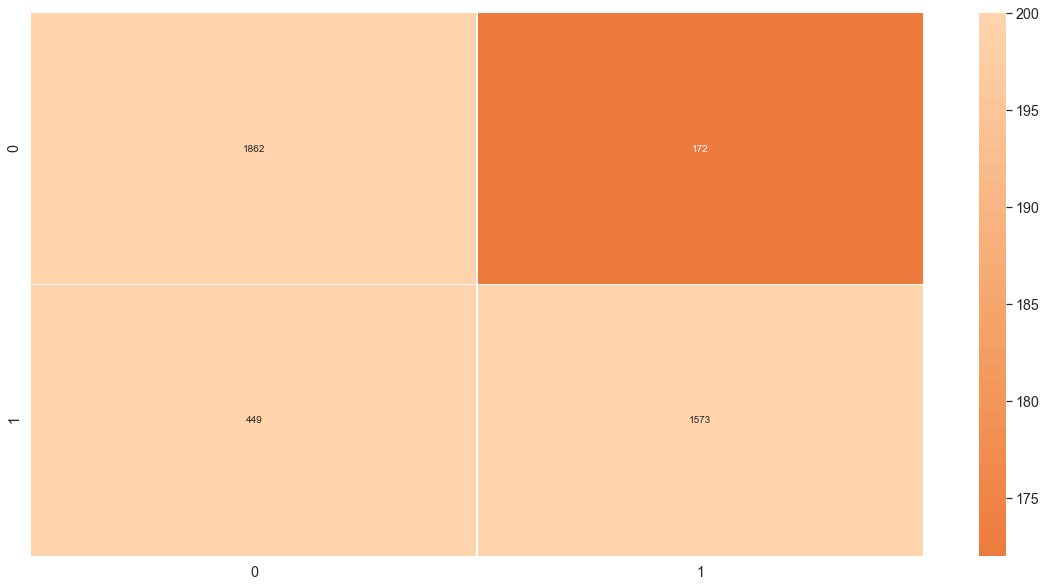

In [187]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(cf, annot=True, fmt="d",linewidths=.5, center = 90, vmax = 200)

In [188]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
# This utility function is from the sklearn docs: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

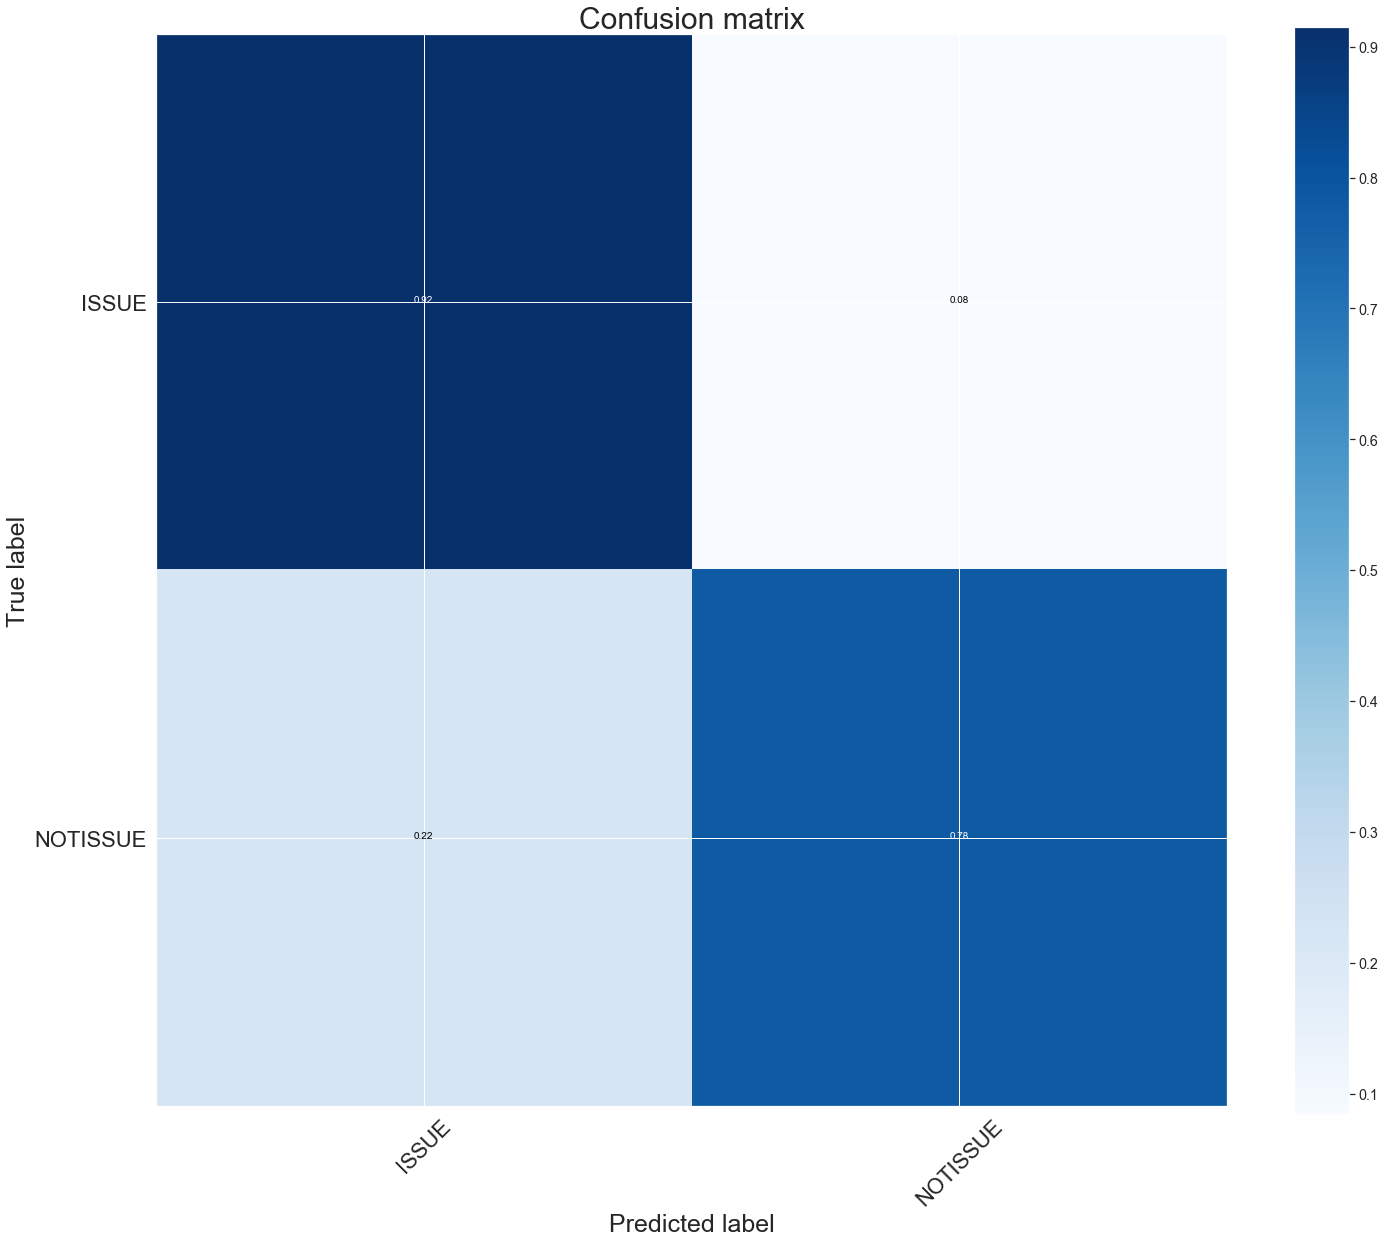

In [189]:
cnf_matrix = confusion_matrix(df.label, data_predict.label)
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=['ISSUE','NOTISSUE'], title="Confusion matrix")
plt.show()

In [190]:
from sklearn.metrics import classification_report, accuracy_score

print('accuracy %s' % accuracy_score(data_predict.label, df.label))
print(classification_report(df.label, data_predict.label,target_names=['ISSUE','NOTISSUE']))

accuracy 0.8468934911242604
              precision    recall  f1-score   support

       ISSUE       0.81      0.92      0.86      2034
    NOTISSUE       0.90      0.78      0.84      2022

   micro avg       0.85      0.85      0.85      4056
   macro avg       0.85      0.85      0.85      4056
weighted avg       0.85      0.85      0.85      4056



In [191]:
def false_pos_neg(input_file,output_file,falses_file):
    diff= pd.DataFrame(columns=['true_label','pred_label', 'Text'])
    data = pd.read_csv(input_file,delimiter=',')
    data_pred = pd.read_csv(output_file,delimiter=';')
    t_labels = data.label
    p_labels = data_pred.label
    
    label=data.text.values
    t_label = t_labels.values
    p_label = p_labels.values
    for i in range(len(t_label)):
        if t_label[i]!=p_label[i]:
            diff = diff.append({'true_label':t_label[i],'pred_label':p_label[i], 'Text':label[i]},ignore_index=True)
    diff.to_csv(falses_file,sep=';')
    return diff

In [192]:
falses_file='Data/false_pred_glove300_with_text_preprocessing_v41.csv'
diff=false_pos_neg(input_file,output_file,falses_file)
print(diff)

    true_label pred_label                                               Text
0     NOTISSUE      ISSUE  have order data cable get well finish work pro...
1     NOTISSUE      ISSUE                                     not be happier
2     NOTISSUE      ISSUE                    look headset long time have get
3        ISSUE   NOTISSUE                               solo technology suck
4        ISSUE   NOTISSUE  picture resolution far comparably price phone ...
5     NOTISSUE      ISSUE                                     prompt service
6     NOTISSUE      ISSUE                                     please headset
7        ISSUE   NOTISSUE  stupid have keep buy new charger car charger c...
8     NOTISSUE      ISSUE                               be look new earpiece
9     NOTISSUE      ISSUE                  phone have have have cheaply make
10       ISSUE   NOTISSUE                            plastic break easy clip
11    NOTISSUE      ISSUE  sanyo have survive dozen drop blackton ill effect